In [1]:
import sagemaker

role = 'arn:aws:iam::359628688765:role/sageUser1'
print(role)

sess = sagemaker.Session()
print(sess)


arn:aws:iam::359628688765:role/sageUser1


In [2]:
bucket = 'sagemaker-detectwally' # custom bucket name.
# bucket = sess.default_bucket()
prefix = 'PROJECTz'

In [3]:
from sagemaker.amazon.amazon_estimator import get_image_uri

training_image = get_image_uri(sess.boto_region_name, 'object-detection', repo_version="latest")
print (training_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/object-detection:latest


In [4]:
train_channel = prefix + '/train'
validation_channel = prefix + '/validation'
train_annotation_channel = prefix + '/train_annotation'
validation_annotation_channel = prefix + '/validation_annotation'

s3_train_data = 's3://{}/{}'.format(bucket, train_channel)
s3_validation_data = 's3://{}/{}'.format(bucket, validation_channel)
s3_train_annotation = 's3://{}/{}'.format(bucket, train_annotation_channel)
s3_validation_annotation = 's3://{}/{}'.format(bucket, validation_annotation_channel)

In [5]:
s3_output_location = 's3://{}/{}/output'.format(bucket, prefix)

In [6]:
od_model = sagemaker.estimator.Estimator(training_image,
                                         role, 
                                         train_instance_count=1, 
                                         train_instance_type='ml.p3.2xlarge',
                                         train_volume_size = 30,
                                         train_max_run = 360000,
                                         input_mode = 'File',
                                         output_path=s3_output_location,
                                         sagemaker_session=sess)

In [7]:
od_model.set_hyperparameters(base_network='vgg-16',
                             use_pretrained_model=1,
                             num_classes=1,
                             mini_batch_size=10,
                             epochs=120,
                             learning_rate=0.00082,
                             lr_scheduler_step='10',
                             lr_scheduler_factor=0.1,
                             optimizer='sgd',
                             momentum=0.9,
                             weight_decay=0.0005,
                             overlap_threshold=0.5,
                             nms_threshold=0.45,
                             image_shape=300,
                             label_width=50,
                             num_training_samples=120)


In [8]:
train_data = sagemaker.session.s3_input(s3_train_data, distribution='FullyReplicated', 
                        content_type='image/jpeg', s3_data_type='S3Prefix')
validation_data = sagemaker.session.s3_input(s3_validation_data, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')
train_annotation = sagemaker.session.s3_input(s3_train_annotation, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')
validation_annotation = sagemaker.session.s3_input(s3_validation_annotation, distribution='FullyReplicated', 
                             content_type='image/jpeg', s3_data_type='S3Prefix')

data_channels = {'train': train_data, 'validation': validation_data, 
                 'train_annotation': train_annotation, 'validation_annotation':validation_annotation}

In [9]:
od_model.fit(inputs=data_channels, logs=True)

INFO:sagemaker:Creating training-job with name: object-detection-2019-05-01-18-03-19-315


2019-05-01 18:03:19 Starting - Starting the training job...
2019-05-01 18:03:23 Starting - Launching requested ML instances......
2019-05-01 18:04:33 Starting - Preparing the instances for training......
2019-05-01 18:05:43 Downloading - Downloading input data
2019-05-01 18:05:43 Training - Downloading the training image......
2019-05-01 18:06:35 Training - Training image download completed. Training in progress.
Docker entrypoint called with argument(s): train
[05/01/2019 18:06:37 INFO 140413464319808] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/default-input.json: {u'label_width': u'350', u'early_stopping_min_epochs': u'10', u'epochs': u'30', u'overlap_threshold': u'0.5', u'lr_scheduler_factor': u'0.1', u'_num_kv_servers': u'auto', u'weight_decay': u'0.0005', u'mini_batch_size': u'32', u'use_pretrained_model': u'0', u'freeze_layer_pattern': u'', u'lr_scheduler_step': u'', u'early_stopping': u'False', u'early_stopping_patience': u'5', u'momentu

[05/01/2019 18:07:07 INFO 140413464319808] #quality_metric: host=algo-1, epoch=2, batch=12 train cross_entropy <loss>=(0.934788600352)
[05/01/2019 18:07:07 INFO 140413464319808] #quality_metric: host=algo-1, epoch=2, batch=12 train smooth_l1 <loss>=(0.654218432051)
[05/01/2019 18:07:07 INFO 140413464319808] Round of batches complete
[05/01/2019 18:07:07 INFO 140413464319808] Updated the metrics
[05/01/2019 18:07:08 INFO 140413464319808] #quality_metric: host=algo-1, epoch=2, validation mAP <score>=(0.00153081131877)
[05/01/2019 18:07:08 INFO 140413464319808] #progress_metric: host=algo-1, completed 2 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max":

[05/01/2019 18:07:27 INFO 140413464319808] #quality_metric: host=algo-1, epoch=10, batch=12 train cross_entropy <loss>=(0.749757968351)
[05/01/2019 18:07:27 INFO 140413464319808] #quality_metric: host=algo-1, epoch=10, batch=12 train smooth_l1 <loss>=(0.585890036452)
[05/01/2019 18:07:27 INFO 140413464319808] Round of batches complete
[05/01/2019 18:07:28 INFO 140413464319808] Updated the metrics
[05/01/2019 18:07:28 INFO 140413464319808] #quality_metric: host=algo-1, epoch=10, validation mAP <score>=(0.0297718791299)
[05/01/2019 18:07:28 INFO 140413464319808] #progress_metric: host=algo-1, completed 9 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:07:49 INFO 140413464319808] #quality_metric: host=algo-1, epoch=18, batch=12 train cross_entropy <loss>=(0.688022962891)
[05/01/2019 18:07:49 INFO 140413464319808] #quality_metric: host=algo-1, epoch=18, batch=12 train smooth_l1 <loss>=(0.552182015806)
[05/01/2019 18:07:49 INFO 140413464319808] Round of batches complete
[05/01/2019 18:07:49 INFO 140413464319808] Updated the metrics
[05/01/2019 18:07:49 INFO 140413464319808] #quality_metric: host=algo-1, epoch=18, validation mAP <score>=(0.136315202373)
[05/01/2019 18:07:49 INFO 140413464319808] #progress_metric: host=algo-1, completed 15 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:08:10 INFO 140413464319808] #quality_metric: host=algo-1, epoch=26, batch=12 train cross_entropy <loss>=(0.631698189712)
[05/01/2019 18:08:10 INFO 140413464319808] #quality_metric: host=algo-1, epoch=26, batch=12 train smooth_l1 <loss>=(0.446132752954)
[05/01/2019 18:08:10 INFO 140413464319808] Round of batches complete
[05/01/2019 18:08:10 INFO 140413464319808] Updated the metrics
[05/01/2019 18:08:10 INFO 140413464319808] #quality_metric: host=algo-1, epoch=26, validation mAP <score>=(0.333845323281)
[05/01/2019 18:08:10 INFO 140413464319808] #progress_metric: host=algo-1, completed 22 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:08:30 INFO 140413464319808] #quality_metric: host=algo-1, epoch=34, batch=12 train cross_entropy <loss>=(0.605540921897)
[05/01/2019 18:08:30 INFO 140413464319808] #quality_metric: host=algo-1, epoch=34, batch=12 train smooth_l1 <loss>=(0.447963615944)
[05/01/2019 18:08:30 INFO 140413464319808] Round of batches complete
[05/01/2019 18:08:30 INFO 140413464319808] Updated the metrics
[05/01/2019 18:08:31 INFO 140413464319808] #quality_metric: host=algo-1, epoch=34, validation mAP <score>=(0.190782778041)
[05/01/2019 18:08:31 INFO 140413464319808] #progress_metric: host=algo-1, completed 29 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:08:46 INFO 140413464319808] #quality_metric: host=algo-1, epoch=40, batch=12 train cross_entropy <loss>=(0.564388644661)
[05/01/2019 18:08:46 INFO 140413464319808] #quality_metric: host=algo-1, epoch=40, batch=12 train smooth_l1 <loss>=(0.442088663748)
[05/01/2019 18:08:46 INFO 140413464319808] Round of batches complete
[05/01/2019 18:08:46 INFO 140413464319808] Updated the metrics
[05/01/2019 18:08:47 INFO 140413464319808] #quality_metric: host=algo-1, epoch=40, validation mAP <score>=(0.541867578132)
[05/01/2019 18:08:47 INFO 140413464319808] #progress_metric: host=algo-1, completed 34 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:09:07 INFO 140413464319808] #quality_metric: host=algo-1, epoch=48, batch=12 train cross_entropy <loss>=(0.549094910975)
[05/01/2019 18:09:07 INFO 140413464319808] #quality_metric: host=algo-1, epoch=48, batch=12 train smooth_l1 <loss>=(0.440670644795)
[05/01/2019 18:09:07 INFO 140413464319808] Round of batches complete
[05/01/2019 18:09:07 INFO 140413464319808] Updated the metrics
[05/01/2019 18:09:08 INFO 140413464319808] #quality_metric: host=algo-1, epoch=48, validation mAP <score>=(0.644585645208)
[05/01/2019 18:09:08 INFO 140413464319808] Updating the best model with validation-mAP=0.644585645208
[05/01/2019 18:09:08 INFO 140413464319808] Saved checkpoint to "/opt/ml/model/model_algo_1-0000.params"
[05/01/2019 18:09:08 INFO 140413464319808] #progress_metric: host=algo-1, completed 40 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0

[05/01/2019 18:09:28 INFO 140413464319808] #quality_metric: host=algo-1, epoch=56, batch=12 train cross_entropy <loss>=(0.548665951058)
[05/01/2019 18:09:28 INFO 140413464319808] #quality_metric: host=algo-1, epoch=56, batch=12 train smooth_l1 <loss>=(0.397618250057)
[05/01/2019 18:09:28 INFO 140413464319808] Round of batches complete
[05/01/2019 18:09:28 INFO 140413464319808] Updated the metrics
[05/01/2019 18:09:28 INFO 140413464319808] #quality_metric: host=algo-1, epoch=56, validation mAP <score>=(0.638166951149)
[05/01/2019 18:09:28 INFO 140413464319808] #progress_metric: host=algo-1, completed 47 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:09:48 INFO 140413464319808] #quality_metric: host=algo-1, epoch=64, batch=12 train cross_entropy <loss>=(0.52323301932)
[05/01/2019 18:09:48 INFO 140413464319808] #quality_metric: host=algo-1, epoch=64, batch=12 train smooth_l1 <loss>=(0.337923947432)
[05/01/2019 18:09:48 INFO 140413464319808] Round of batches complete
[05/01/2019 18:09:48 INFO 140413464319808] Updated the metrics
[05/01/2019 18:09:49 INFO 140413464319808] #quality_metric: host=algo-1, epoch=64, validation mAP <score>=(0.620549418069)
[05/01/2019 18:09:49 INFO 140413464319808] #progress_metric: host=algo-1, completed 54 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max"

[05/01/2019 18:10:09 INFO 140413464319808] #quality_metric: host=algo-1, epoch=72, batch=12 train cross_entropy <loss>=(0.473090882312)
[05/01/2019 18:10:09 INFO 140413464319808] #quality_metric: host=algo-1, epoch=72, batch=12 train smooth_l1 <loss>=(0.308185725413)
[05/01/2019 18:10:09 INFO 140413464319808] Round of batches complete
[05/01/2019 18:10:09 INFO 140413464319808] Updated the metrics
[05/01/2019 18:10:09 INFO 140413464319808] #quality_metric: host=algo-1, epoch=72, validation mAP <score>=(0.704541210979)
[05/01/2019 18:10:09 INFO 140413464319808] #progress_metric: host=algo-1, completed 60 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:10:29 INFO 140413464319808] #quality_metric: host=algo-1, epoch=80, batch=12 train cross_entropy <loss>=(0.490465314998)
[05/01/2019 18:10:29 INFO 140413464319808] #quality_metric: host=algo-1, epoch=80, batch=12 train smooth_l1 <loss>=(0.302374767703)
[05/01/2019 18:10:29 INFO 140413464319808] Round of batches complete
[05/01/2019 18:10:29 INFO 140413464319808] Updated the metrics
[05/01/2019 18:10:30 INFO 140413464319808] #quality_metric: host=algo-1, epoch=80, validation mAP <score>=(0.73000493369)
[05/01/2019 18:10:30 INFO 140413464319808] #progress_metric: host=algo-1, completed 67 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max"

[05/01/2019 18:10:50 INFO 140413464319808] #quality_metric: host=algo-1, epoch=88, batch=12 train cross_entropy <loss>=(0.460002396746)
[05/01/2019 18:10:50 INFO 140413464319808] #quality_metric: host=algo-1, epoch=88, batch=12 train smooth_l1 <loss>=(0.254084963915)
[05/01/2019 18:10:50 INFO 140413464319808] Round of batches complete
[05/01/2019 18:10:50 INFO 140413464319808] Updated the metrics
[05/01/2019 18:10:50 INFO 140413464319808] #quality_metric: host=algo-1, epoch=88, validation mAP <score>=(0.833223148711)
[05/01/2019 18:10:50 INFO 140413464319808] #progress_metric: host=algo-1, completed 74 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:11:11 INFO 140413464319808] #quality_metric: host=algo-1, epoch=97, batch=12 train cross_entropy <loss>=(0.452089063031)
[05/01/2019 18:11:11 INFO 140413464319808] #quality_metric: host=algo-1, epoch=97, batch=12 train smooth_l1 <loss>=(0.262750220207)
[05/01/2019 18:11:11 INFO 140413464319808] Round of batches complete
[05/01/2019 18:11:11 INFO 140413464319808] Updated the metrics
[05/01/2019 18:11:12 INFO 140413464319808] #quality_metric: host=algo-1, epoch=97, validation mAP <score>=(0.640822676481)
[05/01/2019 18:11:12 INFO 140413464319808] #progress_metric: host=algo-1, completed 81 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max

[05/01/2019 18:11:31 INFO 140413464319808] #quality_metric: host=algo-1, epoch=105, batch=12 train cross_entropy <loss>=(0.450699376536)
[05/01/2019 18:11:31 INFO 140413464319808] #quality_metric: host=algo-1, epoch=105, batch=12 train smooth_l1 <loss>=(0.255271953541)
[05/01/2019 18:11:31 INFO 140413464319808] Round of batches complete
[05/01/2019 18:11:32 INFO 140413464319808] Updated the metrics
[05/01/2019 18:11:32 INFO 140413464319808] #quality_metric: host=algo-1, epoch=105, validation mAP <score>=(0.783926561047)
[05/01/2019 18:11:32 INFO 140413464319808] #progress_metric: host=algo-1, completed 88 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "

[05/01/2019 18:11:52 INFO 140413464319808] #quality_metric: host=algo-1, epoch=113, validation mAP <score>=(0.785981057472)
[05/01/2019 18:11:52 INFO 140413464319808] #progress_metric: host=algo-1, completed 95 % of epochs
#metrics {"Metrics": {"Max Batches Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Batches Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Number of Records Since Last Reset": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Batches Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Total Records Seen": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Max Records Seen Between Resets": {"count": 1, "max": 0, "sum": 0.0, "min": 0}, "Reset Count": {"count": 1, "max": 114, "sum": 114.0, "min": 114}}, "EndTime": 1556734312.481913, "Dimensions": {"Host": "algo-1", "Meta": "training_data_iter", "Operation": "training", "Algorithm": "AWS/Object Detection", "epoch": 113}, "StartTime": 1556734309.968996}

[05/01/2019 18:11:


2019-05-01 18:12:08 Uploading - Uploading generated training model
2019-05-01 18:12:25 Completed - Training job completed
Billable seconds: 411


od_model.fit(inputs=data_channels, logs=True)

In [10]:
object_detector = od_model.deploy(initial_instance_count = 1,
                                 instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: object-detection-2019-05-01-18-13-05-246
INFO:sagemaker:Creating endpoint with name object-detection-2019-05-01-18-03-19-315


----------------------------------------------------------------------------------------------------------------------------!

In [11]:
!wget -O test.jpg http://www.kathrynboyd.ca/wp-content/uploads/2014/02/waldo3.jpg
file_name = 'test.jpg'

with open(file_name, 'rb') as image:
    f = image.read()
    b = bytearray(f)
    ne = open('n.txt','wb')
    ne.write(b)

--2019-05-01 18:23:34--  http://www.kathrynboyd.ca/wp-content/uploads/2014/02/waldo3.jpg
Resolving www.kathrynboyd.ca (www.kathrynboyd.ca)... 192.254.232.133
Connecting to www.kathrynboyd.ca (www.kathrynboyd.ca)|192.254.232.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 837011 (817K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 817.39K  2.82MB/s    in 0.3s    

2019-05-01 18:23:35 (2.82 MB/s) - ‘test.jpg’ saved [837011/837011]



In [12]:
import json

object_detector.content_type = 'image/jpeg'
results = object_detector.predict(b)
detections = json.loads(results)
print (detections)

{'prediction': [[0.0, 0.641407310962677, 0.492898166179657, 0.7238843441009521, 0.6273533701896667, 0.8827372789382935], [0.0, 0.09588198363780975, 0.06691694259643555, 0.7548454403877258, 0.12767837941646576, 0.8418564200401306], [0.0, 0.09334482252597809, 0.2867979407310486, 0.028531014919281006, 0.34198451042175293, 0.13602642714977264], [0.0, 0.08864406496286392, 0.784321665763855, 0.21091197431087494, 0.8480023145675659, 0.2855425179004669], [0.0, 0.07091385871171951, 0.2029515951871872, 0.22267520427703857, 0.2652149200439453, 0.36583954095840454], [0.0, 0.06679710000753403, 0.30650749802589417, 0.719296395778656, 0.3627501428127289, 0.8243650794029236], [0.0, 0.06496729701757431, 0.24811449646949768, 0.729361891746521, 0.31811097264289856, 0.8353562355041504], [0.0, 0.06333715468645096, 0.6763914227485657, 0.363737553358078, 0.7206159234046936, 0.40959641337394714], [0.0, 0.055948179215192795, 0.6582275629043579, 0.35973015427589417, 0.7041780948638916, 0.4090592563152313], [0.0

In [13]:
def visualize_detection(img_file, dets, classes=[], thresh=0.6):
        """
        visualize detections in one image
        Parameters:
        ----------
        img : numpy.array
            image, in bgr format
        dets : numpy.array
            ssd detections, numpy.array([[id, score, x1, y1, x2, y2]...])
            each row is one object
        classes : tuple or list of str
            class names
        thresh : float
            score threshold
        """
        import random
        import matplotlib.pyplot as plt
        import matplotlib.image as mpimg

        img=mpimg.imread(img_file)
        plt.imshow(img)
        height = img.shape[0]
        width = img.shape[1]
        colors = dict()
        for det in dets:
            (klass, score, x0, y0, x1, y1) = det
            if score < thresh:
                continue
            cls_id = int(klass)
            if cls_id not in colors:
                colors[cls_id] = (random.random(), random.random(), random.random())
            xmin = int(x0 * width)
            ymin = int(y0 * height)
            xmax = int(x1 * width)
            ymax = int(y1 * height)
            rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                                 ymax - ymin, fill=False,
                                 edgecolor=colors[cls_id],
                                 linewidth=3.5)
            plt.gca().add_patch(rect)
            class_name = str(cls_id)
            if classes and len(classes) > cls_id:
                class_name = classes[cls_id]
            plt.gca().text(xmin, ymin - 2,
                            '{:s} {:.3f}'.format(class_name, score),
                            bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                                    fontsize=12, color='white')
        plt.show()

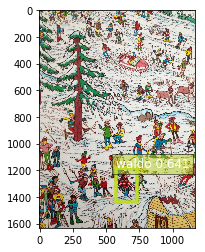

In [16]:
object_categories = ['waldo']
# Setting a threshold 0.20 will only plot detection results that have a confidence score greater than 0.20.
threshold = 0.20

# Visualize the detections.
visualize_detection(file_name, detections['prediction'], object_categories, threshold)

In [15]:
sagemaker.Session().delete_endpoint(object_detector.endpoint)

INFO:sagemaker:Deleting endpoint with name: object-detection-2019-05-01-18-03-19-315
